In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [ ]:
bike_df = pd.read_csv('202207-citbike-tripdata.csv')

In [ ]:
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C09E4093905089BD,classic_bike,2022-07-23 11:34:57,2022-07-23 11:45:08,Melrose St & Broadway,4801.04,Myrtle Ave & Grove St,4816.05,40.697481,-73.935877,40.699050,-73.915160,member
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member
2,4F73CA25880A1215,electric_bike,2022-07-16 16:30:58,2022-07-16 17:39:18,W 37 St & 10 Ave,6611.02,Knickerbocker Ave & Cooper St,4582.05,40.756604,-73.997901,40.690810,-73.904480,member
3,ECD6EE19C0CC1D31,electric_bike,2022-07-17 17:35:57,2022-07-17 18:03:36,W 37 St & 10 Ave,6611.02,6 Ave & Broome St,5610.09,40.756604,-73.997901,40.724310,-74.004730,member
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member


### Warm up questions

#### 1. Using the start time and end time, compute the duration of each ride in minutes and plot the histogram of ride durations.

In [ ]:
bike_df['duration'] = pd.to_datetime(bike_df['ended_at']) - pd.to_datetime(bike_df['started_at'])

In [ ]:
bike_df['duration'].head()

0   0 days 00:10:11
1   0 days 00:07:42
2   0 days 01:08:20
3   0 days 00:27:39
4   0 days 00:02:46
Name: duration, dtype: timedelta64[ns]

In [ ]:
bike_df['duration_min'] = bike_df['duration'].apply(lambda x: x/np.timedelta64(1,'m'))

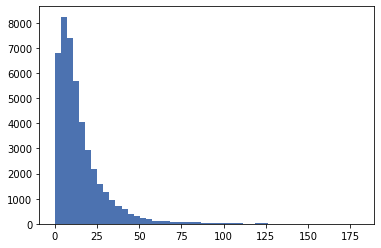

In [ ]:
plt.hist(bike_df['duration_min'], range = [0,180], bins = 50)
plt.show()

In [ ]:
# eliminate rides more than 3 hours
bike_df = bike_df[bike_df['duration_min'] <= 180]

In [ ]:
# eliminate rides with negative duration
bike_df = bike_df[bike_df['duration_min'] >= 0]

2. What is the expected ride duration (i.e., the average ride duration)? What is the empirical variance of ride duration? What is the probability that a ride duration is greater than 20 min?

In [ ]:
# calculate expected ride duration
expected_duration = np.mean(bike_df['duration_min'])
print(expected_duration)

15.08677909265788


In [ ]:
# calculate empirical variance of ride duration
variance_duration = np.var(bike_df['duration_min'])
print(variance_duration)

247.63310993778418


In [ ]:
prob_greater_20 = len(bike_df[bike_df['duration_min']>=20])/len(bike_df['duration_min'])
print(prob_greater_20)

0.2368580603148227


3. What is the probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member? Note that the last column gives whether the ride is for a casual client or a CitiBike member.

In [ ]:
prob_greater_20_citi = len(bike_df[(bike_df['duration_min']>=20) & (bike_df['member_casual']=='member')])/len(bike_df[bike_df['member_casual'] == 'member'])
print(prob_greater_20_citi)

0.18427769270035732


In [ ]:
bike_df['member_casual'][:]=='member'

0         True
1         True
2         True
3         True
4         True
         ...  
44641     True
44642     True
44643     True
44644     True
44645    False
Name: member_casual, Length: 44533, dtype: bool

4. Suppose that the duration of some ride is more than 25min. What is the probability that this ride belongs to a CitiBike member?

In [ ]:
prob_greater_25_belongsCiti = len(bike_df[(bike_df['duration_min']>=25) & (bike_df['member_casual']=='member')])/len(bike_df[bike_df['duration_min'] >= 25])
print(prob_greater_25_belongsCiti)

0.5464796479647965


5. What is the expected ride duration of an electric bike? What is the expected ride duration of a classic bike?

In [ ]:
expected_duration_eletric = np.mean(bike_df[bike_df['rideable_type']=='electric_bike']['duration_min'])
print(expected_duration_eletric)

15.226198461234958


In [ ]:
expected_duration_classic = np.mean(bike_df[bike_df['rideable_type']=='classic_bike']['duration_min'])
print(expected_duration_classic)

14.852786289530545


6. Suppose that the duration of some ride is less than 10min. What is the probability that this ride uses an electric bike? What is the probability that this ride uses a classic bike? Comment on the results.

In [ ]:
prob_less_10_belongsElectirc = len(bike_df[(bike_df['duration_min']<10) & (bike_df['rideable_type']=='electric_bike')])/len(bike_df[bike_df['duration_min'] < 10])
print(prob_less_10_belongsElectirc)

0.22963174966609426


In [ ]:
prob_less_10_belongsClassic = len(bike_df[(bike_df['duration_min']<10) & (bike_df['rideable_type']=='classic_bike')])/len(bike_df[bike_df['duration_min'] < 10])
print(prob_less_10_belongsClassic)

0.767506201106659


## Project Starts Here!

In [ ]:
pd.set_option('max_rows', 99999)

In [ ]:
location_count = bike_df.groupby('start_station_name').count()['ride_id']

In [ ]:
location_count.sort_values(ascending=False).head()

start_station_name
Greenwich St & W Houston St    1142
W 22 St & 10 Ave               1135
FDR Drive & E 35 St            1016
Flatbush Ave & Ocean Ave       1005
Broadway & E 21 St              962
Name: ride_id, dtype: int64

In [ ]:
# pick most busy 3 stations
top_stations = ['Broadway & W 25 St', 'Central Park S & 6 Ave', 'Broadway & E 21 St']

In [ ]:
#change time from string to datetime
bike_df['ended_at_time'] = pd.to_datetime(bike_df['ended_at'])
bike_df['started_at_time'] = pd.to_datetime(bike_df['started_at'])

In [ ]:
#keep only hours from 7am-11pm
bike_df = bike_df[(bike_df['started_at_time'].dt.hour >= 7) & (bike_df['started_at_time'].dt.hour <= 23)]

In [ ]:
bike_df['morning'] = np.where(bike_df['started_at_time'].dt.hour <= 15,1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
0,C09E4093905089BD,classic_bike,2022-07-23 11:34:57,2022-07-23 11:45:08,Melrose St & Broadway,4801.04,Myrtle Ave & Grove St,4816.05,40.697481,-73.935877,40.699050,-73.915160,member,0 days 00:10:11,10.183333,2022-07-23 11:45:08,2022-07-23 11:34:57,1
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member,0 days 00:07:42,7.700000,2022-07-29 18:26:50,2022-07-29 18:19:08,0
2,4F73CA25880A1215,electric_bike,2022-07-16 16:30:58,2022-07-16 17:39:18,W 37 St & 10 Ave,6611.02,Knickerbocker Ave & Cooper St,4582.05,40.756604,-73.997901,40.690810,-73.904480,member,0 days 01:08:20,68.333333,2022-07-16 17:39:18,2022-07-16 16:30:58,0
3,ECD6EE19C0CC1D31,electric_bike,2022-07-17 17:35:57,2022-07-17 18:03:36,W 37 St & 10 Ave,6611.02,6 Ave & Broome St,5610.09,40.756604,-73.997901,40.724310,-74.004730,member,0 days 00:27:39,27.650000,2022-07-17 18:03:36,2022-07-17 17:35:57,0
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member,0 days 00:02:46,2.766667,2022-07-11 07:59:15,2022-07-11 07:56:29,1


In [ ]:
bike_df = bike_df[bike_df['started_at_time'].dt.dayofweek < 5]

In [ ]:
# get data for morning
bike_df_morning = bike_df[bike_df['morning']==1]
bike_df_morning.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member,0 days 00:02:46,2.766667,2022-07-11 07:59:15,2022-07-11 07:56:29,1
13,A178013F1F884220,classic_bike,2022-07-07 15:05:14,2022-07-07 15:11:57,35 St & Broadway,6750.16,38 St & 30 Ave,6850.01,40.760339,-73.922243,40.764175,-73.915840,member,0 days 00:06:43,6.716667,2022-07-07 15:11:57,2022-07-07 15:05:14,1
14,0D2CDEECA15D682E,classic_bike,2022-07-18 13:42:01,2022-07-18 14:05:00,35 St & Broadway,6750.16,38 St & 30 Ave,6850.01,40.760339,-73.922243,40.764175,-73.915840,member,0 days 00:22:59,22.983333,2022-07-18 14:05:00,2022-07-18 13:42:01,1
16,0B4168237A91DCFA,classic_bike,2022-07-15 10:49:49,2022-07-15 10:55:03,Perry St & Bleecker St,5922.07,6 Ave & Broome St,5610.09,40.735418,-74.004157,40.724310,-74.004730,member,0 days 00:05:14,5.233333,2022-07-15 10:55:03,2022-07-15 10:49:49,1
17,6B349D1231B989CB,electric_bike,2022-07-04 11:30:41,2022-07-04 11:45:24,Steinway St & 19 Ave,7220.01,38 St & 30 Ave,6850.01,40.778089,-73.899558,40.764175,-73.915840,casual,0 days 00:14:43,14.716667,2022-07-04 11:45:24,2022-07-04 11:30:41,1


In [ ]:
# keep only top 3 locations for morning
bike_df_morning_top = bike_df_morning[(bike_df_morning['start_station_name'].isin(top_stations)) | (bike_df_morning['end_station_name'].isin(top_stations))]
bike_df_morning_top.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
562,A4B16A26E9053FB6,classic_bike,2022-07-12 08:02:25,2022-07-12 08:31:37,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765961,-73.976360,40.792255,-73.952499,member,0 days 00:29:12,29.200000,2022-07-12 08:31:37,2022-07-12 08:02:25,1
1015,F6EBD13F53062F82,electric_bike,2022-07-21 07:42:01,2022-07-21 07:53:18,Broadway & E 21 St,6098.10,Madison Av & E 51 St,6659.09,40.739888,-73.989586,40.758630,-73.975130,member,0 days 00:11:17,11.283333,2022-07-21 07:53:18,2022-07-21 07:42:01,1
1025,96D496A7B7B73CA3,classic_bike,2022-07-13 15:12:00,2022-07-13 15:38:52,Central Park S & 6 Ave,6876.04,1 Ave & E 94 St,7286.05,40.765909,-73.976342,40.781721,-73.945940,member,0 days 00:26:52,26.866667,2022-07-13 15:38:52,2022-07-13 15:12:00,1
1043,5FF0753D952AF4B0,classic_bike,2022-07-05 13:55:43,2022-07-05 14:12:36,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765903,-73.976377,40.794165,-73.974124,member,0 days 00:16:53,16.883333,2022-07-05 14:12:36,2022-07-05 13:55:43,1
1723,622DCA0E4208014A,classic_bike,2022-07-12 08:20:30,2022-07-12 08:26:40,Broadway & E 21 St,6098.10,E 35 St & Madison Ave,6398.08,40.739888,-73.989586,40.748480,-73.982556,member,0 days 00:06:10,6.166667,2022-07-12 08:26:40,2022-07-12 08:20:30,1


In [ ]:
# get data for evening
bike_df_evening = bike_df[bike_df['morning']==0]
bike_df_evening.head()
# keep only top 3 locations for evening
bike_df_evening_top = bike_df_evening[(bike_df_evening['start_station_name'].isin(top_stations)) | (bike_df_evening['end_station_name'].isin(top_stations))]
bike_df_evening_top.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
463,2B5D07B9DF571C4D,classic_bike,2022-07-08 17:40:05,2022-07-08 17:45:16,Broadway & E 21 St,6098.10,E 25 St & 2 Ave,6046.02,40.739888,-73.989586,40.739126,-73.979738,member,0 days 00:05:11,5.183333,2022-07-08 17:45:16,2022-07-08 17:40:05,0
523,E6A71C538B7E11B5,classic_bike,2022-07-14 17:43:53,2022-07-14 17:59:43,Broadway & E 21 St,6098.10,E 6 St & Avenue D,5506.14,40.739888,-73.989586,40.722281,-73.976687,member,0 days 00:15:50,15.833333,2022-07-14 17:59:43,2022-07-14 17:43:53,0
524,869B1A4F043A2243,electric_bike,2022-07-26 19:40:37,2022-07-26 19:50:42,Broadway & E 21 St,6098.10,E 10 St & Avenue A,5659.05,40.739888,-73.989586,40.727408,-73.981420,member,0 days 00:10:05,10.083333,2022-07-26 19:50:42,2022-07-26 19:40:37,0
532,A6ED42B2CE3D88D0,classic_bike,2022-07-21 17:31:58,2022-07-21 17:43:14,Broadway & E 21 St,6098.10,E 10 St & Avenue A,5659.05,40.739888,-73.989586,40.727408,-73.981420,member,0 days 00:11:16,11.266667,2022-07-21 17:43:14,2022-07-21 17:31:58,0
533,D5C3128C18C4E40B,electric_bike,2022-07-12 19:28:14,2022-07-12 19:50:22,Central Park S & 6 Ave,6876.04,E 10 St & Avenue A,5659.05,40.765909,-73.976342,40.727408,-73.981420,member,0 days 00:22:08,22.133333,2022-07-12 19:50:22,2022-07-12 19:28:14,0


In [ ]:
# Model for central park morning
bike_df_morning_centralPark = bike_df_morning_top[(bike_df_morning['start_station_name']=='Central Park S & 6 Ave')|(bike_df_morning['end_station_name']=='Central Park S & 6 Ave')]
bike_df_morning_centralPark.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
562,A4B16A26E9053FB6,classic_bike,2022-07-12 08:02:25,2022-07-12 08:31:37,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765961,-73.976360,40.792255,-73.952499,member,0 days 00:29:12,29.200000,2022-07-12 08:31:37,2022-07-12 08:02:25,1
1025,96D496A7B7B73CA3,classic_bike,2022-07-13 15:12:00,2022-07-13 15:38:52,Central Park S & 6 Ave,6876.04,1 Ave & E 94 St,7286.05,40.765909,-73.976342,40.781721,-73.945940,member,0 days 00:26:52,26.866667,2022-07-13 15:38:52,2022-07-13 15:12:00,1
1043,5FF0753D952AF4B0,classic_bike,2022-07-05 13:55:43,2022-07-05 14:12:36,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765903,-73.976377,40.794165,-73.974124,member,0 days 00:16:53,16.883333,2022-07-05 14:12:36,2022-07-05 13:55:43,1
1731,CDBEEDAD40546EA2,classic_bike,2022-07-06 13:59:30,2022-07-06 14:15:55,Central Park S & 6 Ave,6876.04,1 Ave & E 78 St,7020.09,40.765909,-73.976342,40.771404,-73.953517,member,0 days 00:16:25,16.416667,2022-07-06 14:15:55,2022-07-06 13:59:30,1
3242,CF3C09E086CF7332,classic_bike,2022-07-15 11:11:14,2022-07-15 11:32:21,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765909,-73.976342,40.792255,-73.952499,casual,0 days 00:21:07,21.116667,2022-07-15 11:32:21,2022-07-15 11:11:14,1


In [ ]:
len(bike_df_morning_centralPark)

115

In [ ]:
# Extract start time from the date
bike_df_morning_centralPark['start_time'] = bike_df_morning_centralPark['started_at'].apply(lambda x: x.split()[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Extract end time from the date
bike_df_morning_centralPark['end_time'] = bike_df_morning_centralPark['ended_at'].apply(lambda x: x.split()[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Extract date from the date
bike_df_morning_centralPark['end_date'] = bike_df_morning_centralPark['ended_at'].apply(lambda x: x.split()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bike_df_morning_centralPark.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning,start_time,end_time,end_date
562,A4B16A26E9053FB6,classic_bike,2022-07-12 08:02:25,2022-07-12 08:31:37,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765961,-73.976360,...,-73.952499,member,0 days 00:29:12,29.200000,2022-07-12 08:31:37,2022-07-12 08:02:25,1,08:02:25,08:31:37,2022-07-12
1025,96D496A7B7B73CA3,classic_bike,2022-07-13 15:12:00,2022-07-13 15:38:52,Central Park S & 6 Ave,6876.04,1 Ave & E 94 St,7286.05,40.765909,-73.976342,...,-73.945940,member,0 days 00:26:52,26.866667,2022-07-13 15:38:52,2022-07-13 15:12:00,1,15:12:00,15:38:52,2022-07-13
1043,5FF0753D952AF4B0,classic_bike,2022-07-05 13:55:43,2022-07-05 14:12:36,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765903,-73.976377,...,-73.974124,member,0 days 00:16:53,16.883333,2022-07-05 14:12:36,2022-07-05 13:55:43,1,13:55:43,14:12:36,2022-07-05
1731,CDBEEDAD40546EA2,classic_bike,2022-07-06 13:59:30,2022-07-06 14:15:55,Central Park S & 6 Ave,6876.04,1 Ave & E 78 St,7020.09,40.765909,-73.976342,...,-73.953517,member,0 days 00:16:25,16.416667,2022-07-06 14:15:55,2022-07-06 13:59:30,1,13:59:30,14:15:55,2022-07-06
3242,CF3C09E086CF7332,classic_bike,2022-07-15 11:11:14,2022-07-15 11:32:21,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765909,-73.976342,...,-73.952499,casual,0 days 00:21:07,21.116667,2022-07-15 11:32:21,2022-07-15 11:11:14,1,11:11:14,11:32:21,2022-07-15


In [ ]:
# Model for central park evening
bike_df_evening_centralPark = bike_df_evening_top[(bike_df_evening['start_station_name']=='Central Park S & 6 Ave')|(bike_df_evening['end_station_name']=='Central Park S & 6 Ave')]
bike_df_evening_centralPark.head()
# Extract start time from the date
bike_df_evening_centralPark['start_time'] = bike_df_evening_centralPark['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_evening_centralPark['end_time'] = bike_df_evening_centralPark['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_evening_centralPark['end_date'] = bike_df_evening_centralPark['ended_at'].apply(lambda x: x.split()[0])
bike_df_evening_centralPark.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning,start_time,end_time,end_date
533,D5C3128C18C4E40B,electric_bike,2022-07-12 19:28:14,2022-07-12 19:50:22,Central Park S & 6 Ave,6876.04,E 10 St & Avenue A,5659.05,40.765909,-73.976342,...,-73.981420,member,0 days 00:22:08,22.133333,2022-07-12 19:50:22,2022-07-12 19:28:14,0,19:28:14,19:50:22,2022-07-12
567,132BC0B6E09227E9,classic_bike,2022-07-11 16:33:42,2022-07-11 16:54:53,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765968,-73.976469,...,-73.952499,casual,0 days 00:21:11,21.183333,2022-07-11 16:54:53,2022-07-11 16:33:42,0,16:33:42,16:54:53,2022-07-11
568,8D0244C997213408,electric_bike,2022-07-21 18:12:15,2022-07-21 18:30:04,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765909,-73.976342,...,-73.952499,member,0 days 00:17:49,17.816667,2022-07-21 18:30:04,2022-07-21 18:12:15,0,18:12:15,18:30:04,2022-07-21
713,7AE30089E6D1FC89,electric_bike,2022-07-04 23:47:47,2022-07-04 23:59:49,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765909,-73.976342,...,-73.974124,member,0 days 00:12:02,12.033333,2022-07-04 23:59:49,2022-07-04 23:47:47,0,23:47:47,23:59:49,2022-07-04
1722,05CF103C9C7E412A,electric_bike,2022-07-01 19:39:15,2022-07-01 19:52:08,Central Park S & 6 Ave,6876.04,1 Ave & E 78 St,7020.09,40.765909,-73.976342,...,-73.953517,member,0 days 00:12:53,12.883333,2022-07-01 19:52:08,2022-07-01 19:39:15,0,19:39:15,19:52:08,2022-07-01


In [ ]:
# build 48 time frames for morning
morning_time = (pd.DataFrame(columns=['NULL'],
                  index=pd.date_range('07:00:00', '15:00:00',
                                      freq='10T'))
       .between_time('07:00:00','15:00:00')
       .index.strftime('%H:%M:%S')
       .tolist()
)

In [ ]:
# build 48 time frames for evening
evening_time = (pd.DataFrame(columns=['NULL'],
                  index=pd.date_range('15:00:00', '23:00:00',
                                      freq='10T'))
       .between_time('15:00:00','23:00:00')
       .index.strftime('%H:%M:%S')
       .tolist()
)

In [ ]:
#evening_time

In [ ]:
len(morning_time)

49

In [ ]:
# get unique days in the month
dates = sorted(bike_df_morning_centralPark['end_date'].unique())
dates

['2022-07-01',
 '2022-07-04',
 '2022-07-05',
 '2022-07-06',
 '2022-07-07',
 '2022-07-08',
 '2022-07-11',
 '2022-07-12',
 '2022-07-13',
 '2022-07-14',
 '2022-07-15',
 '2022-07-18',
 '2022-07-19',
 '2022-07-20',
 '2022-07-21',
 '2022-07-22',
 '2022-07-25',
 '2022-07-26',
 '2022-07-27',
 '2022-07-28',
 '2022-07-29']

In [ ]:
# function for computing net flow
def get_net_flow(time1, time2, station, df):
    net_flow = []
    for n in dates:
      flow = len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['end_station_name'] == station))]) - len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['start_station_name'] == station))])
      net_flow.append(flow)
    return net_flow

In [ ]:
# compute probability of each net flow
def get_flow_prob(net_flow):
  net_flow = pd.DataFrame(net_flow)
  net_flow['count'] = range(len(net_flow))
  net_flow_count = net_flow.groupby(0).count()
  net_flow_count['prob'] = net_flow_count['count']/len(net_flow)
  return net_flow_count

In [ ]:
# function for get all transition matrix of 48 time slots
def get_all_transition_matrix(time_lst, df, station, num_docks):
  # Get all transition matrix for evening central park station
  p_lst = []
  for index in range(len(time_lst)-1):
    time1 = time_lst[index]
    time2 = time_lst[index+1]
    station = station
    df = df
    net_flow = get_net_flow(time1, time2, station, df)
    # create transition probability matrix for 7:00 to 7:10
    num_docks = num_docks
    new_flow_prob = get_flow_prob(net_flow)
    p1 = [[0 for j in range (num_docks)] for i in range (num_docks)]
    for i in range(num_docks):
        for n in new_flow_prob.index:
          if i+n >=0 and i+n < num_docks:
            p1[i][i+n] = float(new_flow_prob[new_flow_prob.index==n]['prob'])
    p1 = pd.DataFrame(p1)
    #p1 = pd.to_numeric(p1)
    p1 = np.array(p1)
    p_lst.append(p1)
  return p_lst

In [ ]:
# function for getting final transition matrix
def get_final_transition_matrix(p_lst):
  # Make all rows in transition matrix equals 1
  for j in range(len(p_lst)):
    for i in range(len(p_lst[j])):
      my_sum = np.sum(p_lst[j][i])
      p_lst[j][i] = [x/my_sum for x in p_lst[j][i]]
  # compute final p matrix by matrix multiplication for evening central park station
  p = p_lst[0]
  for i in range(1,len(p_lst)):
    p = np.matmul(p,p_lst[i])
  p = pd.DataFrame(p)
  return p

In [ ]:
# get final probability transition matrix for morning central park
p_lst_morning_central = get_all_transition_matrix(morning_time, bike_df_morning_centralPark, 'Central Park S & 6 Ave', num_docks=20)
p_morning_central = get_final_transition_matrix(p_lst_morning_central)
p_morning_central

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.986077,0.013923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.935188,0.054422,0.010390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.829115,0.115710,0.045752,0.009424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.675377,0.169317,0.102508,0.043374,0.009424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.501431,0.191054,0.155341,0.099377,0.043374,0.009424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.339041,0.177044,0.179368,0.152372,0.099377,0.043374,0.009424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.209478,0.140140,0.168735,0.177101,0.152372,0.099377,0.043374,0.009424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.118848,0.097309,0.134930,0.167265,0.177101,0.152372,0.099377,0.043374,0.009424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.062222,0.060390,0.094376,0.134098,0.167265,0.177101,0.152372,0.099377,0.043374,0.009424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# get final probability transition matrix for evening central park
p_lst_evening_central = get_all_transition_matrix(evening_time, bike_df_evening_centralPark, 'Central Park S & 6 Ave', num_docks=20)
p_evening_central = get_final_transition_matrix(p_lst_evening_central)
p_evening_central

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.993925,0.006075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.972034,0.024591,0.003374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.914631,0.062947,0.019047,0.003374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.809974,0.113666,0.053938,0.019047,0.003374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.668520,0.156136,0.100847,0.052834,0.018450,0.003214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.512948,0.173418,0.141880,0.098718,0.051682,0.018140,0.003214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.366373,0.162671,0.160944,0.139732,0.097556,0.051370,0.018140,0.003214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.244770,0.133141,0.153646,0.159454,0.138926,0.097339,0.051370,0.018140,0.003214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.154102,0.097695,0.127437,0.152862,0.159029,0.138812,0.097339,0.051370,0.018140,0.003214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Model for 'Broadway & W 25 St' morning
bike_df_morning_broadwayWest = bike_df_morning_top[(bike_df_morning['start_station_name']=='Broadway & W 25 St')|(bike_df_morning['end_station_name']=='Broadway & W 25 St')]
bike_df_morning_broadwayWest.head()
# Extract start time from the date
bike_df_morning_broadwayWest['start_time'] = bike_df_morning_broadwayWest['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_morning_broadwayWest['end_time'] = bike_df_morning_broadwayWest['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_morning_broadwayWest['end_date'] = bike_df_morning_broadwayWest['ended_at'].apply(lambda x: x.split()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
# get final probability transition matrix for morning broadwayWest
p_lst_morning_broadwayWest = get_all_transition_matrix(morning_time, bike_df_morning_broadwayWest, 'Broadway & W 25 St', num_docks=20)
p_morning_broadwayWest = get_final_transition_matrix(p_lst_morning_broadwayWest)
p_morning_broadwayWest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Model for broadwayWest evening
bike_df_evening_broadwayWest = bike_df_evening_top[(bike_df_evening['start_station_name']=='Broadway & W 25 St')|(bike_df_evening['end_station_name']=='Broadway & W 25 St')]
bike_df_evening_broadwayWest.head()
# Extract start time from the date
bike_df_evening_broadwayWest['start_time'] = bike_df_evening_broadwayWest['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_evening_broadwayWest['end_time'] = bike_df_evening_broadwayWest['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_evening_broadwayWest['end_date'] = bike_df_evening_broadwayWest['ended_at'].apply(lambda x: x.split()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
# get final probability transition matrix for evening broadwayWest
p_lst_evening_broadwayWest = get_all_transition_matrix(evening_time, bike_df_evening_broadwayWest, 'Broadway & W 25 St', num_docks=20)
p_evening_broadwayWest = get_final_transition_matrix(p_lst_evening_broadwayWest)
p_evening_broadwayWest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Model for broadwayEast morning
bike_df_morning_broadwayEast = bike_df_morning_top[(bike_df_morning['start_station_name']=='Broadway & E 21 St')|(bike_df_morning['end_station_name']=='Broadway & E 21 St')]
bike_df_morning_broadwayEast.head()
# Extract start time from the date
bike_df_morning_broadwayEast['start_time'] = bike_df_morning_broadwayEast['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_morning_broadwayEast['end_time'] = bike_df_morning_broadwayEast['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_morning_broadwayEast['end_date'] = bike_df_morning_broadwayEast['ended_at'].apply(lambda x: x.split()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [ ]:
# get final probability transition matrix for morning broadwayEast
p_lst_morning_broadwayEast = get_all_transition_matrix(morning_time, bike_df_morning_broadwayEast, 'Broadway & E 21 St', num_docks=20)
p_morning_broadwayEast = get_final_transition_matrix(p_lst_morning_broadwayEast)
p_morning_broadwayEast

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.999990,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.999900,0.000096,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.999428,0.000522,0.000047,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.997725,0.001942,0.000290,0.000041,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.992807,0.005657,0.001224,0.000268,0.000041,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.981123,0.013504,0.003897,0.001165,0.000268,0.000041,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.957751,0.027121,0.009887,0.003763,0.001165,0.000268,0.000041,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.917464,0.046874,0.020789,0.009634,0.003763,0.001165,0.000268,0.000041,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.856456,0.071026,0.037262,0.020383,0.009634,0.003763,0.001165,0.000268,0.000041,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Model for broadwayEast evening
bike_df_evening_broadwayEast = bike_df_evening_top[(bike_df_evening['start_station_name']=='Broadway & E 21 St')|(bike_df_evening['end_station_name']=='Broadway & E 21 St')]
bike_df_evening_broadwayEast.head()
# Extract start time from the date
bike_df_evening_broadwayEast['start_time'] = bike_df_evening_broadwayEast['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_evening_broadwayEast['end_time'] = bike_df_evening_broadwayEast['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_evening_broadwayEast['end_date'] = bike_df_evening_broadwayEast['ended_at'].apply(lambda x: x.split()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [ ]:
# get final probability transition matrix for evening broadwayEast
p_lst_evening_broadwayEast = get_all_transition_matrix(evening_time, bike_df_evening_broadwayEast, 'Broadway & E 21 St', num_docks=20)
p_evening_broadwayEast = get_final_transition_matrix(p_lst_evening_broadwayEast)
p_evening_broadwayEast

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,1.099339e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.999999,6.125296e-07,5.164701e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.999997,2.964479e-06,7.370650e-08,1.986724e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.999987,1.265991e-05,6.575389e-07,4.246248e-08,1.634483e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.999947,4.797342e-05,4.231943e-06,4.621738e-07,3.802526e-08,1.634483e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.999815,1.598481e-04,2.107674e-05,3.340789e-06,4.320157e-07,3.802526e-08,1.634483e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.999425,4.683949e-04,8.491600e-05,1.790263e-05,3.199236e-06,4.320157e-07,3.802526e-08,1.634483e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.998402,1.215425e-03,2.854954e-04,7.567482e-05,1.739692e-05,3.199236e-06,4.320157e-07,3.802526e-08,1.634483e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.996006,2.815995e-03,8.197442e-04,2.627354e-04,7.421999e-05,1.739692e-05,3.199236e-06,4.320157e-07,3.802526e-08,1.634483e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
#############################Our adjusted final model for transition matrices and stationary distribution #####################################

In [ ]:
# use one matrix to estimate transition matrix
# function for computing net flow
def get_net_flow(time1, time2, station, df):
    net_flow = []
    for n in dates:
      flow = len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['end_station_name'] == station))]) - len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['start_station_name'] == station))])
      net_flow.append(flow)
    return net_flow

In [ ]:
def get_net_flow_lst(time_lst, station, df):
    flow_lst_morning_central = []
    for i in range(len(time_lst)-1):
      time1 = time_lst[i]
      time2 = time_lst[i+1]
      station = station
      df = df
      flow_lst_morning_central = flow_lst_morning_central + get_net_flow(time1, time2, station, df)
    return flow_lst_morning_central

In [ ]:
# function for get the transition matrix
def get_transition_matrix(time_lst, df, station, num_docks):
  # Get all transition matrix for evening central park station
    df = df
    time_lst = time_lst
    station = station

    net_flow = get_net_flow_lst(time_lst, station, df)
    # create transition probability matrix for 7:00 to 7:10
    num_docks = num_docks
    new_flow_prob = get_flow_prob(net_flow)
    p1 = [[0 for j in range (num_docks)] for i in range (num_docks)]
    for i in range(num_docks):
        for n in new_flow_prob.index:
          if i+n >=0 and i+n < num_docks:
            p1[i][i+n] = float(new_flow_prob[new_flow_prob.index==n]['prob'])
    p1 = pd.DataFrame(p1)
    #p1 = pd.to_numeric(p1)
    p1 = np.array(p1)
    return p1

In [ ]:
# function for getting transition matrix will row sums to 1
def get_transition_matrix_rowsum1(p):
  # Make all rows in transition matrix equals 1
    for i in range(len(p)):
      my_sum = np.sum(p[i])
      p[i] = [x/my_sum for x in p[i]]
    p = pd.DataFrame(p)
    return p

In [ ]:
#transition matrix for central park in the morning
centralpark_morning = get_transition_matrix_rowsum1(get_transition_matrix(morning_time, bike_df_morning_centralPark, 'Central Park S & 6 Ave', num_docks=20))
centralpark_morning

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.083000,0.917000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.005964,0.082505,0.911531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001984,0.005952,0.082341,0.909722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.001984,0.005952,0.082341,0.909722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.001984,0.005952,0.082341,0.909722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.001984,0.005952,0.082341,0.909722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.001984,0.005952,0.082341,0.909722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.001984,0.005952,0.082341,0.909722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001984,0.005952,0.082341,0.909722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

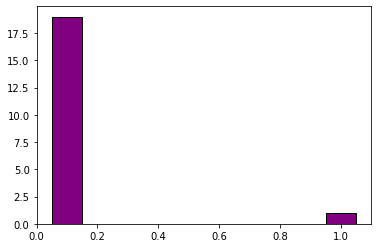

In [ ]:
#stationary distribution of central park in the morning and its histogram
centralpark_morning=np.asarray(centralpark_morning)
transition_matrix_transp = centralpark_morning.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
centralpark_morning_Pi = target_eigenvect / sum(target_eigenvect) 
centralpark_morning_Pi=(centralpark_morning_Pi).real
centralpark_morning_Pi
plt.hist(centralpark_morning_Pi, bins=10, align='right', color='purple', edgecolor='black')





In [ ]:
#transition matrix for central park in the evening
centralpark_evening = get_transition_matrix_rowsum1(get_transition_matrix(evening_time, bike_df_evening_centralPark, 'Central Park S & 6 Ave', num_docks=20))
centralpark_evening

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.096482,0.903518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.011917,0.095333,0.892751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.011917,0.095333,0.892751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.011917,0.095333,0.892751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000992,0.000000,0.000000,0.011905,0.095238,0.891865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000992,0.000000,0.000000,0.011905,0.095238,0.891865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000992,0.000000,0.000000,0.011905,0.095238,0.891865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000992,0.000000,0.000000,0.011905,0.095238,0.891865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000992,0.000000,0.000000,0.011905,0.095238,0.891865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

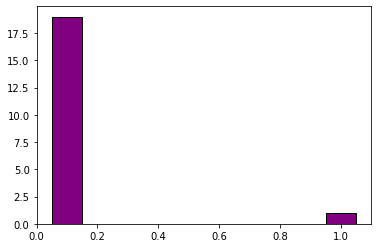

In [ ]:
#stationary distribution of central park in the evening and its histogram
centralpark_evening=np.asarray(centralpark_evening)
transition_matrix_transp = centralpark_evening.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
centralpark_evening_Pi = target_eigenvect / sum(target_eigenvect) 
centralpark_evening_Pi=(centralpark_evening_Pi).real
centralpark_evening_Pi
plt.hist(centralpark_evening_Pi, bins=10, align='right', color='purple', edgecolor='black')

In [ ]:
#transition matrix for BroadwayWest in the morning
BroadwayWest_morning = get_transition_matrix_rowsum1(get_transition_matrix(morning_time, bike_df_morning_broadwayWest, 'Broadway & W 25 St', num_docks=20))
BroadwayWest_morning



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

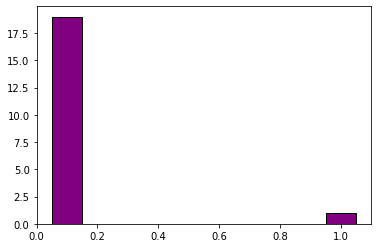

In [ ]:
#stationary distribution of BroadwayWest in the morning and its histogram
BroadwayWest_morning=np.asarray(BroadwayWest_morning)
transition_matrix_transp = BroadwayWest_morning.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayWest_morning_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayWest_morning_Pi=(BroadwayWest_morning_Pi).real
BroadwayWest_morning_Pi
plt.hist(BroadwayWest_morning_Pi, bins=10, align='right', color='purple', edgecolor='black')


In [ ]:
#transition matrix for BroadwayWest in the evening
BroadwayWest_evening = get_transition_matrix_rowsum1(get_transition_matrix(evening_time, bike_df_evening_broadwayWest, 'Broadway & W 25 St', num_docks=20))
BroadwayWest_evening

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

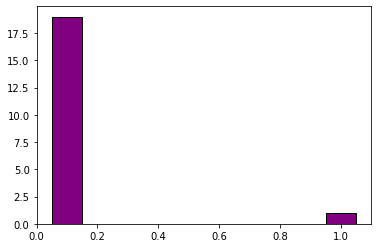

In [ ]:
#stationary distribution of BroadwayWest in the evening and its histogram
BroadwayWest_evening=np.asarray(BroadwayWest_evening)
transition_matrix_transp = BroadwayWest_evening.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayWest_evening_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayWest_evening_Pi=(BroadwayWest_evening_Pi).real
BroadwayWest_evening_Pi
plt.hist(BroadwayWest_evening_Pi, bins=10, align='right', color='purple', edgecolor='black')

In [ ]:
#transition matrix for BroadwayEest in the morning
BroadwayEast_morning = get_transition_matrix_rowsum1(get_transition_matrix(morning_time, bike_df_morning_broadwayEast, 'Broadway & E 21 St', num_docks=20))
BroadwayEast_morning

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.207528,0.792472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.019940,0.203390,0.776670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.003972,0.019861,0.202582,0.773585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000992,0.003968,0.019841,0.202381,0.772817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000992,0.003968,0.019841,0.202381,0.772817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000992,0.003968,0.019841,0.202381,0.772817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000992,0.003968,0.019841,0.202381,0.772817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000992,0.003968,0.019841,0.202381,0.772817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000992,0.003968,0.019841,0.202381,0.772817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

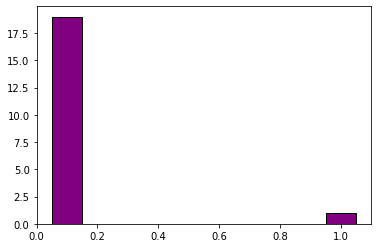

In [ ]:
#stationary distribution of BroadwayEast in the morning and its histogram
BroadwayEast_morning=np.asarray(BroadwayEast_morning)
transition_matrix_transp = BroadwayEast_morning.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayEast_morning_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayEast_morning_Pi=(BroadwayEast_morning_Pi).real
BroadwayEast_morning_Pi
plt.hist(BroadwayEast_morning_Pi, bins=10, align='right', color='purple', edgecolor='black')

In [ ]:
#transition matrix for BroadwayEest in the evening
BroadwayEast_evening = get_transition_matrix_rowsum1(get_transition_matrix(evening_time, bike_df_evening_broadwayEast, 'Broadway & E 21 St', num_docks=20))
BroadwayEast_evening

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.233083,0.766917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.054822,0.220305,0.724873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.018924,0.053785,0.216135,0.711155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003968,0.018849,0.053571,0.215278,0.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.003968,0.018849,0.053571,0.215278,0.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.003968,0.018849,0.053571,0.215278,0.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.003968,0.018849,0.053571,0.215278,0.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.003968,0.018849,0.053571,0.215278,0.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.003968,0.018849,0.053571,0.215278,0.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#stationary distribution of BroadwayEast in the evening and its histogram
BroadwayEast_evening=np.asarray(BroadwayEast_evening)
transition_matrix_transp = BroadwayEast_evening.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayEast_evening_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayEast_evening_Pi=(BroadwayEast_evening_Pi).real
BroadwayEast_evening_Pi


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

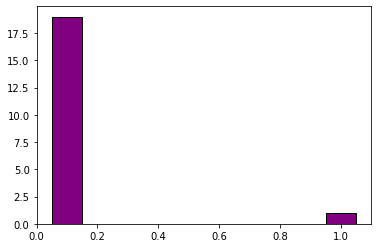

In [ ]:

plt.hist(BroadwayEast_evening_Pi, bins=10, align='right', color='purple', edgecolor='black')

